# TODO
1. Make find_neighborhood faster

# Call Center Exploratory Data Analysis I
## Overview
- Load cleaned call center data that was previously generated
- Add a `neighborhood` column that shows which neighborhood the request is in
- Look at the geospatial distribution of these events
    - Where are most happening?
    - Which areas have the most closed/open requests?
    - Which areas have receive attention the fastest?

In [1]:
# Standard tools for data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# Tools specific for geospatial data analysis
from mpl_toolkits.basemap import Basemap
import shapely
from shapely.geometry import shape, mapping, Point, Polygon
import geopandas as gpd
import geojsonio
from matplotlib.collections import PatchCollection
from descartes import PolygonPatch

# Tools from the Python Standard Library
import os
import re

from IPython.display import display
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
RESULTSDIR = '../results/'
!ls $RESULTSDIR

01-air_quality.h5      01-neighborhoods.h5    01-service_requests.h5


Read in the DataFrame that was previously generated:

In [3]:
service_requests = pd.read_hdf(RESULTSDIR + '01-service_requests.h5')
service_requests.head()

,REQUESTID,DATETIMEINIT,SOURCE,DESCRIPTION,REQCATEGORY,STATUS,DATETIMECLOSED,coordinates,time_to_close,time_since_init
1,770584,2017-11-01 06:34:04,SeeClickFix,Parking - Enforcement,TRAFFIC_ENGIN,OPEN,NaT,"(37.78502, -122.221176)",NaT,20 days 17:25:56
2,770585,2017-11-01 07:22:20,SeeClickFix,"Graffiti on Street, Street Light, Traffic Signal,",GRAFFITI,WOCREATE,NaT,"(37.812325, -122.256729)",NaT,20 days 16:37:40
3,770586,2017-11-01 07:29:17,Website,Litter - Street Litter Container - Overflowing...,ILLDUMP,OPEN,NaT,"(37.791987, -122.213031)",NaT,20 days 16:30:43
4,770587,2017-11-01 07:29:18,Website,Litter - Street Litter Container - Overflowing...,ILLDUMP,CANCEL,NaT,"(37.791987, -122.213031)",NaT,20 days 16:30:42
5,770588,2017-11-01 07:30:42,SeeClickFix,Oakland Police - Abandoned Auto,OTHER,REFERRED,NaT,"(37.747044, -122.194686)",NaT,20 days 16:29:18


In [4]:
service_requests = service_requests[:20000]

Read in the neighborhood information:

In [5]:
DATADIR = '../data/'

In [6]:
neighborhoods = gpd.read_file(DATADIR + 'oakland_neighborhoods.geojson')

Drop the entries that are of type `Point`. The simplest method was just to check the transition from `Point` to `Polygon`.

In [7]:
neighborhoods = neighborhoods.iloc[137:]

In [8]:
neighborhoods.head()

,name,description,geometry
137,Acorn/ Acorn Industrial,,"(POLYGON ((-122.280212520786 37.8025938890711,..."
138,Adams Point,,"(POLYGON ((-122.247844000895 37.810057515347, ..."
139,Allendale,,"(POLYGON ((-122.196320300415 37.7863349418319,..."
140,Arroyo Viejo,,"(POLYGON ((-122.170503431087 37.759584556553, ..."
141,Bancroft Business/ Havenscourt,,"(POLYGON ((-122.177112657994 37.7654884250132,..."


Now that we have only the shapes of these regions, we can determine which neighborhoods these requests are occuring in. Let's make a function to test which neighborhood a GPS coordinate is in:

In [9]:
def find_neighborhood(coord, neighborhoods):
    
    # Reverse the coordinates since we plot them in (x, y) = (longitude, latitude), whereas GPS coordinates are
    # typically (latitude, longitude)
    coord = coord[::-1]
    
    for idx, neighborhood in neighborhoods.iterrows():
        try: 
            Point(coord).within(neighborhood['geometry'])
        except:
            return 'CONFLICT'
        if  Point(coord).within(neighborhood['geometry']):
            return neighborhood['name']
        
    return 'N/A'

Let's test this out:

In [10]:
for coords in service_requests['coordinates'][:10]:
    print(find_neighborhood(coords, neighborhoods))

Patten
Adams Point
Upper Peralta Creek/ Bartlett
Upper Peralta Creek/ Bartlett
Coliseum Industrial
Downtown
McClymonds
Northgate
Coliseum Industrial
Ralph Bunche


Cool! We can apply this to all entries in our `service_request` DataFrame and determine which neighborhood the requests are in. 

In [11]:
service_requests['neighborhood'] = service_requests['coordinates'].apply(lambda x: find_neighborhood(x, neighborhoods))

TopologyException: side location conflict at -122.1393346786749 37.737391181756728
TopologyException: side location conflict at -122.1393346786749 37.737391181756728
TopologyException: side location conflict at -122.1393346786749 37.737391181756728
TopologyException: side location conflict at -122.1393346786749 37.737391181756728
TopologyException: side location conflict at -122.1393346786749 37.737391181756728
TopologyException: side location conflict at -122.1393346786749 37.737391181756728
TopologyException: side location conflict at -122.1393346786749 37.737391181756728
TopologyException: side location conflict at -122.1393346786749 37.737391181756728
TopologyException: side location conflict at -122.1393346786749 37.737391181756728
TopologyException: side location conflict at -122.1393346786749 37.737391181756728
TopologyException: side location conflict at -122.1393346786749 37.737391181756728
TopologyException: side location conflict at -122.1393346786749 37.737391181756728
Topo

TopologyException: side location conflict at -122.1393346786749 37.737391181756728
TopologyException: side location conflict at -122.1393346786749 37.737391181756728
TopologyException: side location conflict at -122.1393346786749 37.737391181756728
TopologyException: side location conflict at -122.1393346786749 37.737391181756728
TopologyException: side location conflict at -122.1393346786749 37.737391181756728
TopologyException: side location conflict at -122.1393346786749 37.737391181756728
TopologyException: side location conflict at -122.1393346786749 37.737391181756728
TopologyException: side location conflict at -122.1393346786749 37.737391181756728
TopologyException: side location conflict at -122.1393346786749 37.737391181756728
TopologyException: side location conflict at -122.1393346786749 37.737391181756728
TopologyException: side location conflict at -122.1393346786749 37.737391181756728
TopologyException: side location conflict at -122.1393346786749 37.737391181756728
Topo

In [12]:
service_requests.head()

,REQUESTID,DATETIMEINIT,SOURCE,DESCRIPTION,REQCATEGORY,STATUS,DATETIMECLOSED,coordinates,time_to_close,time_since_init,neighborhood
1,770584,2017-11-01 06:34:04,SeeClickFix,Parking - Enforcement,TRAFFIC_ENGIN,OPEN,NaT,"(37.78502, -122.221176)",NaT,20 days 17:25:56,Patten
2,770585,2017-11-01 07:22:20,SeeClickFix,"Graffiti on Street, Street Light, Traffic Signal,",GRAFFITI,WOCREATE,NaT,"(37.812325, -122.256729)",NaT,20 days 16:37:40,Adams Point
3,770586,2017-11-01 07:29:17,Website,Litter - Street Litter Container - Overflowing...,ILLDUMP,OPEN,NaT,"(37.791987, -122.213031)",NaT,20 days 16:30:43,Upper Peralta Creek/ Bartlett
4,770587,2017-11-01 07:29:18,Website,Litter - Street Litter Container - Overflowing...,ILLDUMP,CANCEL,NaT,"(37.791987, -122.213031)",NaT,20 days 16:30:42,Upper Peralta Creek/ Bartlett
5,770588,2017-11-01 07:30:42,SeeClickFix,Oakland Police - Abandoned Auto,OTHER,REFERRED,NaT,"(37.747044, -122.194686)",NaT,20 days 16:29:18,Coliseum Industrial


Let's group by neighborhood and get some descriptive statistics:

In [25]:
service_requests['neighborhood'].value_counts()[:10]

Clawson              389
McClymonds           344
Longfellow           331
Hoover/ Foster       329
Prescott             322
Highland             296
Fitchburg            257
Maxwell Park         249
Adams Point          246
Cleveland Heights    245
Name: neighborhood, dtype: int64

Most don't fall within our neighborhood segements...

## Distribution of response times

Let's look at the distribution of response times in units of days:

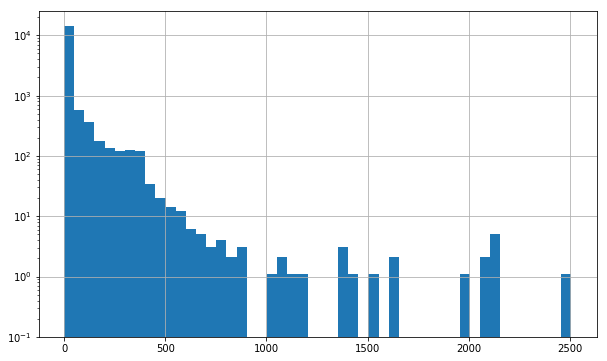

In [14]:
service_requests['time_to_close'].astype('timedelta64[D]').hist(bins=50, bottom=0.1)
plt.yscale('log')

In [15]:
service_requests['time_to_close'].mean()

Timedelta('28 days 10:40:53.649708')

The time to close has a mean of a month, but we can see that there are still quite a few that take longer. How about we look at these values over the different neighborhoods? First, we need to convert the time delta data types to something more useful (i.e., that won't break pandas):

In [16]:
service_requests.loc[:, 'time_to_close'] = service_requests['time_to_close'].astype('timedelta64[D]')

Let's look at the top 10 neighborhoods in their wait time:

In [17]:
(service_requests.groupby('neighborhood')[['time_to_close']]
                 .mean()
                 .sort_values('time_to_close', ascending=False)
)[:10]

,time_to_close
neighborhood,
Panoramic Hill,95.058824
Montclair Business,93.230769
Not Named4,84.750000
Frick,84.300971
Shepherd Canyon,82.210526
Fairfax Business/ Wentworth/ Holland,81.476923
Produce & Waterfront,79.514286
Columbia Gardens,79.171429
Cleveland Heights,76.923445


And now the bottom 10 (i.e., with the fastest response):

In [18]:
(service_requests.groupby('neighborhood')[['time_to_close']]
                 .mean()
                 .sort_values('time_to_close', ascending=True)
)[:10]

,time_to_close
neighborhood,
Not Named2,4.166667
Mills College,8.260870
Woodland,8.979167
McClymonds,9.329749
South Stonehurst,10.293706
Merritt,10.653061
Durant Manor,10.720000
South Prescott,10.818182
Not Named8,10.914530


Let's get a map of these to get a sense of how these are geospatially distributed. To do this, let's overlay the neighborhoods on top of a map, and color code the neighborhoods based on their mean time to close.

Let's drop the N/A values

In [19]:
service_requests = service_requests[~(service_requests['neighborhood'] == 'N/A')]

In [20]:
mean_time_to_close = service_requests.groupby('neighborhood')['time_to_close'].mean()

In [21]:
neighborhoods = neighborhoods.join(mean_time_to_close, on='name')

In [22]:
neighborhoods.head()

,name,description,geometry,time_to_close
137,Acorn/ Acorn Industrial,,"(POLYGON ((-122.280212520786 37.8025938890711,...",21.061538
138,Adams Point,,"(POLYGON ((-122.247844000895 37.810057515347, ...",29.497297
139,Allendale,,"(POLYGON ((-122.196320300415 37.7863349418319,...",36.017391
140,Arroyo Viejo,,"(POLYGON ((-122.170503431087 37.759584556553, ...",24.000000
141,Bancroft Business/ Havenscourt,,"(POLYGON ((-122.177112657994 37.7654884250132,...",34.252941


https://ocefpaf.github.io/python4oceanographers/blog/2015/08/24/choropleth/

Longitude range:  (-122.35304219896193, -122.10048551341704)
Latitude range:  (37.68944924029288, 37.894234908415413)


/Users/kjbilton/Installs/miniconda2/envs/oakland/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


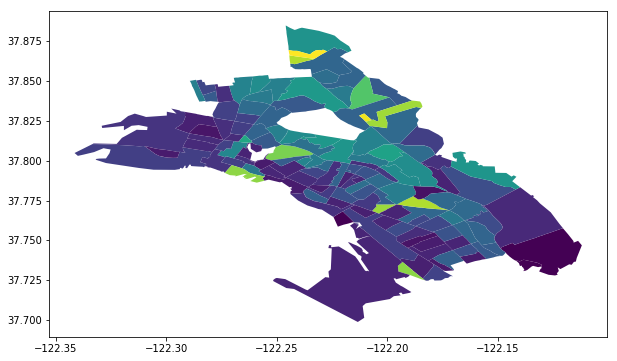

In [23]:
f, ax = plt.subplots()
neighborhoods.plot(column='time_to_close', ax=ax)

print('Longitude range: ', ax.get_xlim())
print('Latitude range: ', ax.get_ylim())

# Get the limits of our map
llcrnrlon, urcrnrlon = ax.get_xlim()
llcrnrlat, urcrnrlat = ax.get_ylim()

/Users/kjbilton/Installs/miniconda2/envs/oakland/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


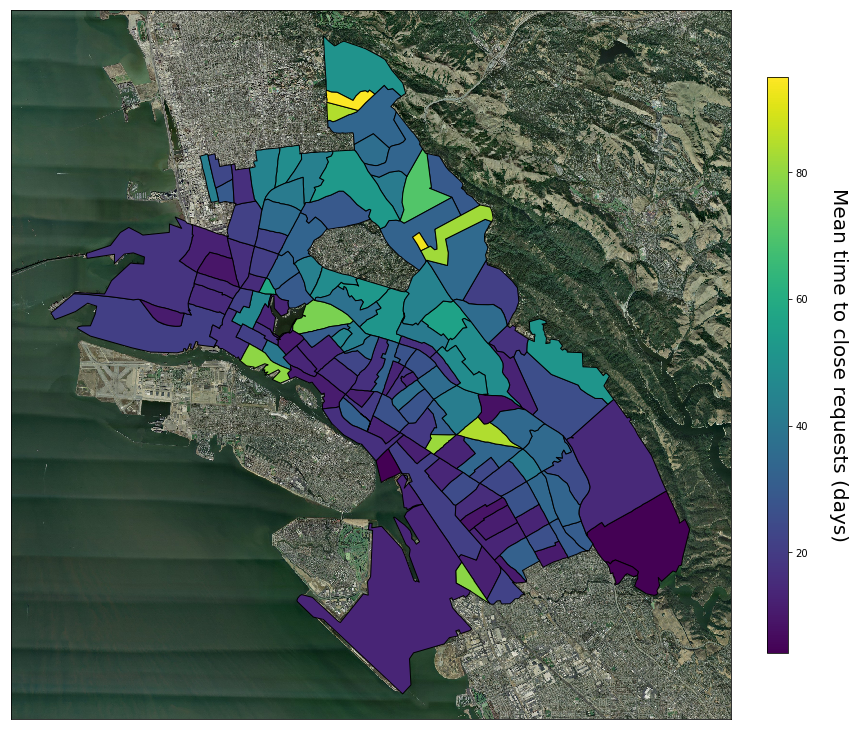

In [24]:
# Create a canvas
f = plt.figure(figsize=(10,10))
ax = f.add_axes([0.,0.,1.,1.])
    
# Create a map
bm = Basemap(epsg=3493,
                 llcrnrlon=llcrnrlon,
                 llcrnrlat=llcrnrlat,
                 urcrnrlon=urcrnrlon,
                 urcrnrlat=urcrnrlat,
                 ax=ax)

bm.arcgisimage(service='ESRI_Imagery_World_2D', xpixels=2000)

# Plot the neighborhoods
patches = []

for poly in neighborhoods.geometry:
    for subpoly in poly:
        mpoly = shapely.ops.transform(bm, poly)
        patches.append(PolygonPatch(mpoly))

pc = PatchCollection(patches, match_original=True)

# Color code these patches based on the time_to_close of that neighborhood
pc.set_array(neighborhoods['time_to_close'].values)
pc.set_clim([neighborhoods['time_to_close'].min(), neighborhoods['time_to_close'].max()])


ax.add_collection(pc)

# Create a color bar
cax = f.add_axes([1.05, 0.1, 0.03, 0.8])
cbar = f.colorbar(pc, cax=cax)
cbar.set_label('Mean time to close requests (days)', rotation=270, labelpad=40, fontsize=20)